# Introduction

##### This project aims to explore the relationship between minimum wage, happiness, and social support in 31 countries. The primary focus is to analyze whether countries with relatively low minimum wages but high happiness scores also report higher levels of social support compared to countries with high happiness and high minimum wages, as well as the relationship between social support and happiness and the relationship between minimum wage, social support and happiness scores for the data as a whole. Additionally, the project investigates the connection between minimum wage and government corruption.

##### Minimum wage, representing the lowest legally mandated remuneration for workers, has been associated with happiness and well-being globally. By examining the interplay between minimum wage, happiness scores, and social support, this project sheds light on the factors influencing happiness and well-being within different socioeconomic contexts. Moreover, it delves into the relationship between minimum wage and government corruption.


### Questions:

##### * What is the relationship between the average social support score for countries with relatively low minimum wage but high happiness scores as compared to the average social support score for countries with relatively high minimum wage and high happiness scores as well as to the average social support score for all countries?

##### * What is the relationship between average social support scores and average happiness scores? 

##### * What is the relationship between social support, happiness scores and minimum wage? 
 
##### * What is the relationship between minimum wage and government corruption.  Do countries with a relatively low minimum wage correlate significantly with higher levels of government corruption?


# Methodology

##### Data was taken from the website https://www.kaggle.com accessed on 3/7/2022

##### 1. https://www.kaggle.com/datasets/frtgnn/minimum-wages-between-2001-2018

##### CSV name: MINIMUM_WAGES.csv
##### The dataset provided by Firat Gonen gives the minimum wage of 31 countries. The minimum wage is yearly in US Dollars. The countries appear to have been selected randomly.

##### 2. https://www.kaggle.com/datasets/unsdsn/world-happiness?select=2015.csv

##### CSV name: 2015.csv, 2016.csv, 2017.csv, 2018.csv
##### The datasets provided by Sustainable Development Solutions Network gives the happiness score for 155-158 countries. The happiness scores and rankings use data from the Gallup World Poll. The scores are based on answers to the main life evaluation question asked in the poll.  The dataset for the year 2019 was not included since the MINIMUM_WAGES dataset only goes up to the year 2018.



# Results

### 1. Import Libraries

In [1]:
from platform import python_version
print(python_version())

3.9.13


In [2]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats



### 2. Import Datasets 

In [3]:
# Use pandas to read the csv files.

mini = pd.read_csv('data/MINIMUM_WAGES.csv')
hap15 = pd.read_csv('data/2015.csv')
hap16 = pd.read_csv('data/2016.csv')
hap17 = pd.read_csv('data/2017.csv')
hap18 = pd.read_csv('data/2018.csv')


### 3. Clean the data

##### Strip the string data of whitespace and rename columns and rows in the datasets that use different column names or text ids for the same values between the respective datasets to avoid generating any missing info once the merge function has been deployed. Columns for the years 2001-2014 in the MINIMUM_WAGE dataset have been dropped since those years are not present in the happiness datasets. Columns that are not mutually present across all respective happiness datasets are dropped. 

In [4]:
# Clean the data.

mini = mini.applymap(lambda x: x.strip() if isinstance (x,str) else x)
hap15 = hap15.applymap(lambda x: x.strip() if isinstance (x, str) else x)
hap16 = hap16.applymap(lambda x: x.strip() if isinstance (x, str) else x)
hap17 = hap17.applymap(lambda x: x.strip() if isinstance (x, str) else x)
hap18 = hap18.applymap(lambda x: x.strip() if isinstance (x, str) else x)

mini['Country'] = mini['Country'].replace(['Korea', 'Slovak Republic', 'Russian Federation'], 
                                        ['South Korea', 'Slovakia', 'Russia'])
mini = mini.drop(['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
                 '2009', '2010', '2011', '2012', '2013', '2014'], axis=1)

hap15 = hap15.drop(['Standard Error', 'Region', 'Happiness Rank', 'Dystopia Residual'], axis=1)
hap15 = hap15.rename(columns={'Family':'Social support','Health (Life Expectancy)':'Healthy life expectancy',
                             'Trust (Government Corruption)':'Government Corruption'})

hap16 = hap16.drop(['Lower Confidence Interval','Upper Confidence Interval', 'Region',
                    'Happiness Rank', 'Dystopia Residual'],axis=1)
hap16 = hap16.rename(columns={'Family':'Social support', 'Health (Life Expectancy)':'Healthy life expectancy', 
                             'Trust (Government Corruption)':'Government Corruption'})

hap17 = hap17.drop(['Whisker.high', 'Whisker.low', 'Happiness.Rank', 'Dystopia.Residual'], axis=1)
hap17 = hap17.rename(columns={'Happiness.Score':'Happiness Score', 
                              'Economy..GDP.per.Capita.':'Economy (GDP per Capita)','Family':'Social support', 
                              'Health..Life.Expectancy.':'Healthy life expectancy',
                              'Trust..Government.Corruption.':'Government Corruption'})
hap17.insert(7, 'Generosity', hap17.pop('Generosity'))

hap18 = hap18.drop(['Overall rank'], axis=1)
hap18.insert(7, 'Generosity', hap18.pop('Generosity'))
hap18 = hap18.rename(columns={'Country or region':'Country', 'Score':'Happiness Score',
                             'GDP per capita':'Economy (GDP per Capita)', 'Freedom to make life choices':
                             'Freedom', 'Perceptions of corruption':'Government Corruption'})





In [5]:
# Check a sample of the output and headings for minimum wage data.

mini.head()

,Country,2015,2016,2017,2018
0,Australia,22718.9,22982.2,23187.2,23975.6
1,Belgium,22119.2,21908.5,21882.2,21654.4
2,Canada,17338.9,17606.8,17913.0,19811.1
3,Chile,6534.6,6893.9,7178.7,7319.5
4,Czech Republic,8217.9,8783.1,9525.6,10342.4


In [6]:
# Check data types, etc...
mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  31 non-null     object 
 1   2015     31 non-null     float64
 2   2016     31 non-null     float64
 3   2017     31 non-null     float64
 4   2018     31 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.3+ KB


In [7]:
# Check headings for happiness score datasets.
hap15.head()

,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom,Government Corruption,Generosity
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [8]:
hap15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   158 non-null    object 
 1   Happiness Score           158 non-null    float64
 2   Economy (GDP per Capita)  158 non-null    float64
 3   Social support            158 non-null    float64
 4   Healthy life expectancy   158 non-null    float64
 5   Freedom                   158 non-null    float64
 6   Government Corruption     158 non-null    float64
 7   Generosity                158 non-null    float64
dtypes: float64(7), object(1)
memory usage: 10.0+ KB


In [9]:
hap16.head()

,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom,Government Corruption,Generosity
0,Denmark,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


In [10]:
hap16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   157 non-null    object 
 1   Happiness Score           157 non-null    float64
 2   Economy (GDP per Capita)  157 non-null    float64
 3   Social support            157 non-null    float64
 4   Healthy life expectancy   157 non-null    float64
 5   Freedom                   157 non-null    float64
 6   Government Corruption     157 non-null    float64
 7   Generosity                157 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.9+ KB


In [11]:
hap17.head()

,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom,Government Corruption,Generosity
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.315964,0.362012
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.400770,0.355280
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.153527,0.475540
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.367007,0.290549
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.382612,0.245483


In [12]:
hap17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   155 non-null    object 
 1   Happiness Score           155 non-null    float64
 2   Economy (GDP per Capita)  155 non-null    float64
 3   Social support            155 non-null    float64
 4   Healthy life expectancy   155 non-null    float64
 5   Freedom                   155 non-null    float64
 6   Government Corruption     155 non-null    float64
 7   Generosity                155 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.8+ KB


In [13]:
hap18.head()

,Country,Happiness Score,Economy (GDP per Capita),Social support,Healthy life expectancy,Freedom,Government Corruption,Generosity
0,Finland,7.632,1.305,1.592,0.874,0.681,0.393,0.202
1,Norway,7.594,1.456,1.582,0.861,0.686,0.340,0.286
2,Denmark,7.555,1.351,1.590,0.868,0.683,0.408,0.284
3,Iceland,7.495,1.343,1.644,0.914,0.677,0.138,0.353
4,Switzerland,7.487,1.420,1.549,0.927,0.660,0.357,0.256


In [14]:
hap18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   156 non-null    object 
 1   Happiness Score           156 non-null    float64
 2   Economy (GDP per Capita)  156 non-null    float64
 3   Social support            156 non-null    float64
 4   Healthy life expectancy   156 non-null    float64
 5   Freedom                   156 non-null    float64
 6   Government Corruption     155 non-null    float64
 7   Generosity                156 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.9+ KB


##### There is a null value present in the 'Trust (Government Corruption)' column.

In [15]:
# Remove null value by replacing it with a zero.
hap18['Government Corruption'] = hap18['Government Corruption'].fillna(0)
hap18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Country                   156 non-null    object 
 1   Happiness Score           156 non-null    float64
 2   Economy (GDP per Capita)  156 non-null    float64
 3   Social support            156 non-null    float64
 4   Healthy life expectancy   156 non-null    float64
 5   Freedom                   156 non-null    float64
 6   Government Corruption     156 non-null    float64
 7   Generosity                156 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.9+ KB


##### The null value has been removed.

### 4. Make a Dataframe

##### Create a dataframe by merging the minimum wage dataset with the happiness datasets using countries that are present in all the respective data sets. 

In [16]:
# Create data frame.

minihappy = pd.merge(mini, hap15, left_on='Country', right_on='Country', how='inner', suffixes=('', '_2015'))
minihappy = pd.merge(minihappy, hap16, left_on='Country', right_on='Country', how='inner', suffixes=('', '_2016'))
minihappy = pd.merge(minihappy, hap17, left_on='Country', right_on='Country', how='inner', suffixes=('', '_2017'))
minihappy = pd.merge(minihappy, hap18, left_on='Country', right_on='Country', how='inner', suffixes=('', '_2018'))

minihappy = minihappy.rename(columns={'Happiness Score':'Happiness Score_2015',
                                      'Economy (GDP per Capita)':'Economy (GDP per Capita)_2015',
                                      'Social support':'Social support_2015',
                                      'Healthy life expectancy':'Healthy life expectancy_2015',
                                      'Freedom':'Freedom_2015',
                                      'Government Corruption':'Government Corruption_2015',
                                      'Generosity':'Generosity_2015',
                                      })

# Display the maximum columns
pd.set_option('display.max_columns', None)

# Print data frame
minihappy.head()




,Country,2015,2016,2017,2018,Happiness Score_2015,Economy (GDP per Capita)_2015,Social support_2015,Healthy life expectancy_2015,Freedom_2015,Government Corruption_2015,Generosity_2015,Happiness Score_2016,Economy (GDP per Capita)_2016,Social support_2016,Healthy life expectancy_2016,Freedom_2016,Government Corruption_2016,Generosity_2016,Happiness Score_2017,Economy (GDP per Capita)_2017,Social support_2017,Healthy life expectancy_2017,Freedom_2017,Government Corruption_2017,Generosity_2017,Happiness Score_2018,Economy (GDP per Capita)_2018,Social support_2018,Healthy life expectancy_2018,Freedom_2018,Government Corruption_2018,Generosity_2018
0,Australia,22718.9,22982.2,23187.2,23975.6,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,7.284,1.484415,1.510042,0.843887,0.601607,0.301184,0.477699,7.272,1.340,1.573,0.910,0.647,0.302,0.361
1,Belgium,22119.2,21908.5,21882.2,21654.4,6.937,1.30782,1.28566,0.89667,0.58450,0.22540,0.22250,6.929,1.42539,1.05249,0.81959,0.51354,0.26248,0.24240,6.891,1.463781,1.462313,0.818092,0.539771,0.251343,0.231503,6.927,1.324,1.483,0.894,0.583,0.240,0.188
2,Canada,17338.9,17606.8,17913.0,19811.1,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,7.316,1.479204,1.481349,0.834558,0.611101,0.287372,0.435540,7.328,1.330,1.532,0.896,0.653,0.291,0.321
3,Chile,6534.6,6893.9,7178.7,7319.5,6.670,1.10715,1.12447,0.85857,0.44132,0.12869,0.33363,6.705,1.21670,0.90587,0.81883,0.37789,0.11451,0.31595,6.652,1.252785,1.284025,0.819480,0.376895,0.082288,0.326662,6.476,1.131,1.331,0.808,0.431,0.061,0.197
4,Czech Republic,8217.9,8783.1,9525.6,10342.4,6.505,1.17898,1.20643,0.84483,0.46364,0.02652,0.10686,6.596,1.30915,1.00793,0.76376,0.41418,0.03986,0.09929,6.609,1.352682,1.433885,0.754444,0.490946,0.036873,0.088107,6.711,1.233,1.489,0.854,0.543,0.034,0.064


In [17]:
# Rename hap15 columns.  


minihappy = minihappy.rename(columns={'Happiness Score':'Happiness Score_2015',
                                      'Economy (GDP per Capita)':'Economy (GDP per Capita)_2015',
                                      'Social support':'Social support_2015',
                                      'Healthy life expectancy':'Healthy life expectancy_2015',
                                      'Freedom':'Freedom_2015',
                                      'Trust (Government Corruption)':'Trust (Government Corruption)_2015',
                                      'Generosity':'Generosity_2015',
                                      })

# Print data frame
minihappy.head()


,Country,2015,2016,2017,2018,Happiness Score_2015,Economy (GDP per Capita)_2015,Social support_2015,Healthy life expectancy_2015,Freedom_2015,Government Corruption_2015,Generosity_2015,Happiness Score_2016,Economy (GDP per Capita)_2016,Social support_2016,Healthy life expectancy_2016,Freedom_2016,Government Corruption_2016,Generosity_2016,Happiness Score_2017,Economy (GDP per Capita)_2017,Social support_2017,Healthy life expectancy_2017,Freedom_2017,Government Corruption_2017,Generosity_2017,Happiness Score_2018,Economy (GDP per Capita)_2018,Social support_2018,Healthy life expectancy_2018,Freedom_2018,Government Corruption_2018,Generosity_2018
0,Australia,22718.9,22982.2,23187.2,23975.6,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,7.284,1.484415,1.510042,0.843887,0.601607,0.301184,0.477699,7.272,1.340,1.573,0.910,0.647,0.302,0.361
1,Belgium,22119.2,21908.5,21882.2,21654.4,6.937,1.30782,1.28566,0.89667,0.58450,0.22540,0.22250,6.929,1.42539,1.05249,0.81959,0.51354,0.26248,0.24240,6.891,1.463781,1.462313,0.818092,0.539771,0.251343,0.231503,6.927,1.324,1.483,0.894,0.583,0.240,0.188
2,Canada,17338.9,17606.8,17913.0,19811.1,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,7.316,1.479204,1.481349,0.834558,0.611101,0.287372,0.435540,7.328,1.330,1.532,0.896,0.653,0.291,0.321
3,Chile,6534.6,6893.9,7178.7,7319.5,6.670,1.10715,1.12447,0.85857,0.44132,0.12869,0.33363,6.705,1.21670,0.90587,0.81883,0.37789,0.11451,0.31595,6.652,1.252785,1.284025,0.819480,0.376895,0.082288,0.326662,6.476,1.131,1.331,0.808,0.431,0.061,0.197
4,Czech Republic,8217.9,8783.1,9525.6,10342.4,6.505,1.17898,1.20643,0.84483,0.46364,0.02652,0.10686,6.596,1.30915,1.00793,0.76376,0.41418,0.03986,0.09929,6.609,1.352682,1.433885,0.754444,0.490946,0.036873,0.088107,6.711,1.233,1.489,0.854,0.543,0.034,0.064


In [18]:
# Check data types, etc...
minihappy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        31 non-null     object 
 1   2015                           31 non-null     float64
 2   2016                           31 non-null     float64
 3   2017                           31 non-null     float64
 4   2018                           31 non-null     float64
 5   Happiness Score_2015           31 non-null     float64
 6   Economy (GDP per Capita)_2015  31 non-null     float64
 7   Social support_2015            31 non-null     float64
 8   Healthy life expectancy_2015   31 non-null     float64
 9   Freedom_2015                   31 non-null     float64
 10  Government Corruption_2015     31 non-null     float64
 11  Generosity_2015                31 non-null     float64
 12  Happiness Score_2016           31 non-null     float

In [19]:
# Check for null values
minihappy.isna().sum()

Country                          0
2015                             0
2016                             0
2017                             0
2018                             0
Happiness Score_2015             0
Economy (GDP per Capita)_2015    0
Social support_2015              0
Healthy life expectancy_2015     0
Freedom_2015                     0
Government Corruption_2015       0
Generosity_2015                  0
Happiness Score_2016             0
Economy (GDP per Capita)_2016    0
Social support_2016              0
Healthy life expectancy_2016     0
Freedom_2016                     0
Government Corruption_2016       0
Generosity_2016                  0
Happiness Score_2017             0
Economy (GDP per Capita)_2017    0
Social support_2017              0
Healthy life expectancy_2017     0
Freedom_2017                     0
Government Corruption_2017       0
Generosity_2017                  0
Happiness Score_2018             0
Economy (GDP per Capita)_2018    0
Social support_2018 

##### There are no null values

### 5. Compare countries with relatively low minimum wage, but high happiness scores to countries with high minimum wage and high happiness scores on the life evaluation variable of social support.

In [20]:
# Write a function that creates a data frame that filters for countries with relatively 
# low minimum wage but high happiness scores.

def low_minimum_wage_high_happiness(minihappy):
    # Create a new dataframe with the Minimum Wage and Happiness Score columns for each year.
    minhap2 = pd.DataFrame(data=minihappy[['Country', '2015','2016','2017','2018',
                                'Happiness Score_2015', 'Happiness Score_2016',
                                'Happiness Score_2017', 'Happiness Score_2018']])
    
    # Calculate the average minimum wage and happiness scores for each country during 2015-2018
    minhap2['Average Minimum Wage 2015-2018'] = minhap2[['2015','2016','2017','2018']].mean(axis=1)
    minhap2['Average Happiness Score 2015-2018'] = minhap2[['Happiness Score_2015', 'Happiness Score_2016',
                                'Happiness Score_2017', 'Happiness Score_2018']].mean(axis=1)
    
    # Filter for countries with relatively low minimum wage and high happiness scores.
    low_wage_high_happiness = minhap2[(minhap2['Average Minimum Wage 2015-2018'] < 
                                       minhap2['Average Minimum Wage 2015-2018'].median()) & 
                                      (minhap2['Average Happiness Score 2015-2018'] > 
                                       minhap2['Average Happiness Score 2015-2018'].median())] 
    # Sort the result by happiness score in descending order.
    low_wage_high_happiness = low_wage_high_happiness.sort_values(by='Average Happiness Score 2015-2018',ascending=False)
    
    return low_wage_high_happiness

low_happy = low_minimum_wage_high_happiness(minihappy)
low_happy


,Country,2015,2016,2017,2018,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Average Minimum Wage 2015-2018,Average Happiness Score 2015-2018
27,Costa Rica,9007.5,9261.9,9113.7,9132.3,7.226,7.087,7.079,7.072,9128.850,7.11600
16,Mexico,1946.6,2011.8,2079.0,2188.0,7.187,6.778,6.578,6.488,2056.350,6.75775
28,Brazil,4926.0,5059.0,5207.2,5114.3,6.983,6.952,6.635,6.419,5076.625,6.74725
3,Chile,6534.6,6893.9,7178.7,7319.5,6.670,6.705,6.652,6.476,6981.675,6.62575
4,Czech Republic,8217.9,8783.1,9525.6,10342.4,6.505,6.596,6.609,6.711,9217.250,6.60525


##### Create a new data frame to compare the average social support scores for the five countries in the low_happy data frame with the average social support scores for other countries during the years 2015-2018.

In [21]:
# Create a data frame for the average social support scores for the countries in the low_happy data frame.
social_support = minihappy.iloc[[27,16,28,3,4], [0,7, 14, 21, 28]]
social_support['Average Social Support 2015-2018'] = social_support.mean(axis=1)
social_support


/var/folders/fq/ssrkbmxx7mncl8h7g2g0406m0000gn/T/ipykernel_10575/2888609147.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  social_support['Average Social Support 2015-2018'] = social_support.mean(axis=1)


,Country,Social support_2015,Social support_2016,Social support_2017,Social support_2018,Average Social Support 2015-2018
27,Costa Rica,1.23788,1.02152,1.416404,1.459,1.283701
16,Mexico,0.91451,0.71460,1.210862,1.252,1.022993
28,Brazil,1.23287,1.03938,1.431306,1.474,1.294389
3,Chile,1.12447,0.90587,1.284025,1.331,1.161341
4,Czech Republic,1.20643,1.00793,1.433885,1.489,1.284311


In [22]:
social_support.describe()

,Social support_2015,Social support_2016,Social support_2017,Social support_2018,Average Social Support 2015-2018
count,5.000000,5.00000,5.000000,5.000000,5.000000
mean,1.143232,0.93786,1.355296,1.401000,1.209347
std,0.135695,0.13517,0.102015,0.104329,0.117699
min,0.914510,0.71460,1.210862,1.252000,1.022993
25%,1.124470,0.90587,1.284025,1.331000,1.161341
50%,1.206430,1.00793,1.416404,1.459000,1.283701
75%,1.232870,1.02152,1.431306,1.474000,1.284311
max,1.237880,1.03938,1.433885,1.489000,1.294389


In [23]:
# Find the average social support score for countries with low minimum wages but high happiness scores.
low_happy_ss_avg = social_support['Average Social Support 2015-2018'].mean()
low_happy_ss_avg

1.2093470993022915

##### Make a dataframe for countries with relativley high minimum wage and high happiness scores.

In [24]:
# Write a function that creates a data frame that filters for countries with relatively 
# high minimum wage and high happiness scores.

def high_minimum_wage_high_happiness(minihappy):
    # Create a new dataframe with the Minimum Wage and Happiness Score columns for each year.
    minhap3 = pd.DataFrame(data=minihappy[['Country', '2015','2016','2017','2018',
                                'Happiness Score_2015', 'Happiness Score_2016',
                                'Happiness Score_2017', 'Happiness Score_2018']])
    
    # Calculate the average minimum wage and happiness scores for each country during 2015-2018
    minhap3['Average Minimum Wage 2015-2018'] = minhap3[['2015','2016','2017','2018']].mean(axis=1)
    minhap3['Average Happiness Score 2015-2018'] = minhap3[['Happiness Score_2015', 'Happiness Score_2016',
                                'Happiness Score_2017', 'Happiness Score_2018']].mean(axis=1)
    
    # Filter for countries with relatively high minimum wage and high happiness scores.
    high_wage_high_happiness = minhap3[(minhap3['Average Minimum Wage 2015-2018'] > 
                                       minhap3['Average Minimum Wage 2015-2018'].median()) & 
                                      (minhap3['Average Happiness Score 2015-2018'] > 
                                       minhap3['Average Happiness Score 2015-2018'].median())] 
    # Sort the result by happiness score in descending order.
    high_wage_high_happiness = high_wage_high_happiness.sort_values(by='Average Happiness Score 2015-2018',ascending=False)
    
    return high_wage_high_happiness

high_happy = high_minimum_wage_high_happiness(minihappy)
high_happy

,Country,2015,2016,2017,2018,Happiness Score_2015,Happiness Score_2016,Happiness Score_2017,Happiness Score_2018,Average Minimum Wage 2015-2018,Average Happiness Score 2015-2018
17,Netherlands,23036.1,23408.2,23504.6,23520.6,7.378,7.339,7.377,7.441,23367.375,7.38375
2,Canada,17338.9,17606.8,17913.0,19811.1,7.427,7.404,7.316,7.328,18167.450,7.36875
18,New Zealand,19696.3,20238.9,20528.0,20932.5,7.286,7.334,7.314,7.324,20348.925,7.31450
0,Australia,22718.9,22982.2,23187.2,23975.6,7.284,7.313,7.284,7.272,23215.975,7.28825
10,Israel,13068.9,13644.4,14365.4,15104.2,7.278,7.267,7.213,6.814,14045.725,7.14300
26,United States,15976.5,15777.4,15448.3,15080.0,7.119,7.104,6.993,6.886,15570.550,7.02550
9,Ireland,18275.1,19329.9,19474.8,20008.7,6.940,6.907,6.977,6.977,19272.125,6.95025
1,Belgium,22119.2,21908.5,21882.2,21654.4,6.937,6.929,6.891,6.927,21891.075,6.92100
15,Luxembourg,24218.8,24148.6,24671.3,24553.0,6.946,6.871,6.863,6.910,24397.925,6.89750
25,United Kingdom,17970.6,19558.3,19663.3,20053.1,6.867,6.725,6.714,7.190,19311.325,6.87400


In [25]:
# Create a data frame for the average social support scores for the countries in the high_happy data frame.
social_support2 = minihappy.iloc[[17,2,18,0,10,26,9,1,15,25], [0,7,14,21,28]]
social_support2['Average Social Support 2015-2018'] = social_support2.mean(axis=1)
social_support2

/var/folders/fq/ssrkbmxx7mncl8h7g2g0406m0000gn/T/ipykernel_10575/549889473.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  social_support2['Average Social Support 2015-2018'] = social_support2.mean(axis=1)


,Country,Social support_2015,Social support_2016,Social support_2017,Social support_2018,Average Social Support 2015-2018
17,Netherlands,1.28017,1.02912,1.428939,1.488,1.306557
2,Canada,1.32261,1.09610,1.481349,1.532,1.358015
18,New Zealand,1.31967,1.17278,1.548195,1.601,1.410411
0,Australia,1.30923,1.10476,1.510042,1.573,1.374258
10,Israel,1.22393,0.99537,1.376290,1.559,1.288647
26,United States,1.24711,1.04782,1.419921,1.471,1.296463
9,Ireland,1.36948,1.16157,1.558231,1.583,1.418070
1,Belgium,1.28566,1.05249,1.462313,1.483,1.320866
15,Luxembourg,1.21963,1.03999,1.457584,1.520,1.309301
25,United Kingdom,1.28548,1.08672,1.496460,1.433,1.325415


In [26]:
social_support2.describe()

,Social support_2015,Social support_2016,Social support_2017,Social support_2018,Average Social Support 2015-2018
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.286297,1.078672,1.473932,1.524300,1.340800
std,0.046888,0.057063,0.057121,0.054957,0.046805
min,1.219630,0.995370,1.376290,1.433000,1.288647
25%,1.255375,1.041948,1.436100,1.484250,1.307243
50%,1.285570,1.069605,1.471831,1.526000,1.323140
75%,1.317060,1.102595,1.506646,1.569500,1.370197
max,1.369480,1.172780,1.558231,1.601000,1.418070


In [27]:
# Find the average social support score for countries with high happiness and high minimum wage.
high_happy_ss_avg = social_support2['Average Social Support 2015-2018'].mean()
high_happy_ss_avg

1.3408003344402315

##### Find the average social support score for all countries .

In [28]:
# Create a data frame that returns the Average social support scores for each country. 
minihappy_ss = minihappy.iloc[:,[0, 7, 14, 21, 28]]
minihappy_ss['Average Social Support 2015-2018'] = minihappy_ss.mean(axis=1)
minihappy_ss

/var/folders/fq/ssrkbmxx7mncl8h7g2g0406m0000gn/T/ipykernel_10575/2438441586.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  minihappy_ss['Average Social Support 2015-2018'] = minihappy_ss.mean(axis=1)
/var/folders/fq/ssrkbmxx7mncl8h7g2g0406m0000gn/T/ipykernel_10575/2438441586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  minihappy_ss['Average Social Support 2015-2018'] = minihappy_ss.mean(axis=1)


,Country,Social support_2015,Social support_2016,Social support_2017,Social support_2018,Average Social Support 2015-2018
0,Australia,1.30923,1.10476,1.510042,1.573,1.374258
1,Belgium,1.28566,1.05249,1.462313,1.483,1.320866
2,Canada,1.32261,1.09610,1.481349,1.532,1.358015
3,Chile,1.12447,0.90587,1.284025,1.331,1.161341
4,Czech Republic,1.20643,1.00793,1.433885,1.489,1.284311
5,Estonia,1.22791,1.05163,1.476671,1.532,1.322053
6,France,1.26038,1.00508,1.387777,1.466,1.279809
7,Greece,0.92933,0.75473,1.239415,1.202,1.031369
8,Hungary,1.20215,0.93164,1.343133,1.401,1.219481
9,Ireland,1.36948,1.16157,1.558231,1.583,1.418070


In [29]:
# Find the average social support score for all countries.
minihappy_ss_avg = minihappy_ss['Average Social Support 2015-2018'].mean()
minihappy_ss_avg

1.2730761028520523

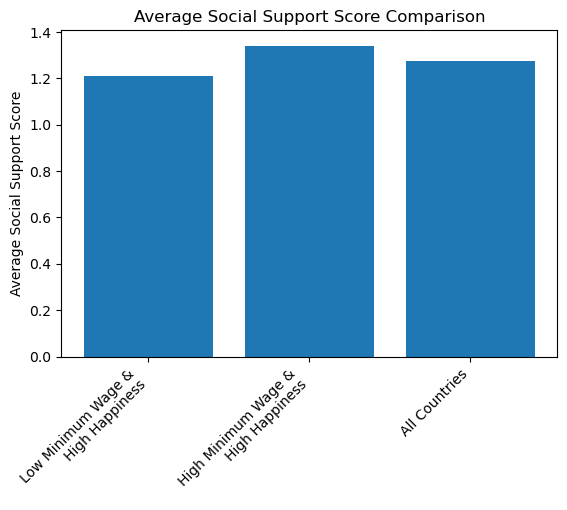

In [30]:
# Data
categories = ['Low Minimum Wage &\nHigh Happiness', 'High Minimum Wage &\nHigh Happiness', 'All Countries']
averages = [low_happy_ss_avg, high_happy_ss_avg, minihappy_ss_avg]

# Create bar chart
plt.bar(categories, averages)

# Add labels and title
plt.xlabel('')
plt.ylabel('Average Social Support Score')
plt.title('Average Social Support Score Comparison')

# Rotate x-axis labels at a diagonal angle and align them to the right
plt.xticks(rotation=45, ha='right')

# Adjust the y-axis position for stacked labels
plt.subplots_adjust(bottom=0.2)

# Display the chart
plt.show()

### Notes on Findings

##### *The countries with low minimum wage had a average social support score of 1.20934.
##### *The countries with high minimum wage and high happiness had a average social support score of 1.3408.
##### *The average social support score for all countries was 1.273

###  6. Compare average social support scores with average happiness scores for all countries.

In [31]:
# Create a data frame for average social support scores and average happiness scores for all countries. 
# Begin by creating a series using the minihappy_ss data frame to return the average social support for each country.
minihappy_ss = minihappy_ss.set_index('Country')
minihappy_ss2 = minihappy_ss.loc[:,['Average Social Support 2015-2018']]

# Sort values by countries with highest social support to lowest.
minihappy_ss2 = minihappy_ss2.sort_values(by='Average Social Support 2015-2018', ascending=False)


minihappy_ss2.head()

,Average Social Support 2015-2018
Country,
Ireland,1.418070
New Zealand,1.410411
Spain,1.378333
Australia,1.374258
Canada,1.358015


##### Find the average happiness score for each country

In [32]:
# Create a data frame of the happiness scores for countries during
# the years 2015-2018



happiness_score = minihappy.loc[:,['Country', 'Happiness Score_2015', 'Happiness Score_2016', 'Happiness Score_2017',
                                  'Happiness Score_2018']]


# Find the average happiness score for each country during the years 2015-2018

happiness_score['Average Happiness Score 2015-2018'] = happiness_score.mean(axis=1)

# Create a series using the average happiness scores for each contry during the year 2015-2018

happiness_score = happiness_score.set_index('Country')
happiness_score = happiness_score.loc[:,['Average Happiness Score 2015-2018']]

# Sort values by countries with highest happiness score to lowest
happiness_score = happiness_score.sort_values('Average Happiness Score 2015-2018', ascending=False)

happiness_score.head()


/var/folders/fq/ssrkbmxx7mncl8h7g2g0406m0000gn/T/ipykernel_10575/1624945861.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  happiness_score['Average Happiness Score 2015-2018'] = happiness_score.mean(axis=1)


,Average Happiness Score 2015-2018
Country,
Netherlands,7.38375
Canada,7.36875
New Zealand,7.31450
Australia,7.28825
Israel,7.14300


In [33]:
# Concatenate minihappy_ss2 series with happiness_score series
social_happy = pd.concat([minihappy_ss2, happiness_score], axis=1)
social_happy

,Average Social Support 2015-2018,Average Happiness Score 2015-2018
Country,,
Ireland,1.418070,6.95025
New Zealand,1.410411,7.31450
Spain,1.378333,6.35075
Australia,1.374258,7.28825
Canada,1.358015,7.36875
Slovakia,1.348682,6.08600
Lithuania,1.330519,5.87500
United Kingdom,1.325415,6.87400
Slovenia,1.322125,5.83050


In [34]:
# reset index to facilitate creation of charts and plots
social_happy = social_happy.reset_index()
social_happy.head()

,Country,Average Social Support 2015-2018,Average Happiness Score 2015-2018
0,Ireland,1.418070,6.95025
1,New Zealand,1.410411,7.31450
2,Spain,1.378333,6.35075
3,Australia,1.374258,7.28825
4,Canada,1.358015,7.36875


### 7. Graph 3: Scatterplot with Regression Line for Average Social Support and Happiness Scores 2015-2018

Regression Equation: y = 2.983x + 2.583
Correlation Coefficient: 0.444
p-value: 0.012
Standard Error: 1.118


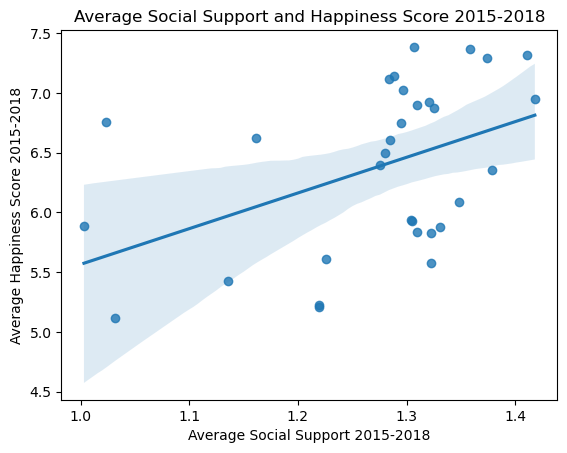

In [35]:
sns.regplot(x='Average Social Support 2015-2018', y='Average Happiness Score 2015-2018', data=social_happy)

#Set the x and y axis labels.
plt.xlabel('Average Social Support 2015-2018')
plt.ylabel('Average Happiness Score 2015-2018')

#Set the title of the plot.
plt.title('Average Social Support and Happiness Score 2015-2018')

#Calculate the regression equation, correlation coefficient, p-value, and standard error.
slope, intercept, r_value, p_value, std_err = stats.linregress(social_happy['Average Social Support 2015-2018'],
social_happy['Average Happiness Score 2015-2018'])
correlation_coefficient = np.corrcoef(social_happy['Average Social Support 2015-2018'], social_happy['Average Happiness Score 2015-2018'])[0,1]

#Display the regression equation, correlation coefficient, p-value, and standard error.
#Set the slope, intercept, correlation coefficient, and p_value to .3f to round the numbers to three decimal places.
print(f"Regression Equation: y = {slope:.3f}x + {intercept:.3f}")
print(f"Correlation Coefficient: {correlation_coefficient:.3f}")
print(f"p-value: {p_value:.3f}")
print(f"Standard Error: {std_err:.3f}")

#Display the plot.
plt.show()

### Notes on Findings

##### * There is a positive correlation between average social support and average happiness scores. As the average social support increases, the average happiness scores also tend to increase. This is indicated by the positive slope of the regression line.

##### *The correlation coefficient of 0.444 suggests a moderate positive relationship between average social support and average happiness scores.

##### *The p-value of 0.012 indicates that the observed correlation between average social support and average happiness scores is statistically significant.

##### *The regression equation of y = 2.983x + 2.583 shows that, on average, for every unit increase in the average social support, the average happiness score is expected to increase by approximately 2.983 units..



### 8. Create a 3D plot comparing average social support, average minimum wage and average happiness scores.

##### Find the average minimum wage for each country

In [36]:
# Create a data frame using minimum wage data.
mini2 = minihappy.loc[:,['Country', '2015','2016','2017','2018']]

# Find the average minimum wage for each country over the years 2015-2018.
mini2['Average Minimum Wage Yearly in USD 2015-2018']=mini2.mean(axis=1)

# Create a series featuring the average minimum wage for the years 2015-2018 for all the countries present
# across the repsective datasets.

mini2 = mini2.set_index('Country')
mini2 = mini2.loc[:,['Average Minimum Wage Yearly in USD 2015-2018']]

# Sort the data from countries with the highest minum wage to the lowest.
mini2 = mini2.sort_values('Average Minimum Wage Yearly in USD 2015-2018', ascending=False)

mini2

/var/folders/fq/ssrkbmxx7mncl8h7g2g0406m0000gn/T/ipykernel_10575/661077405.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mini2['Average Minimum Wage Yearly in USD 2015-2018']=mini2.mean(axis=1)


,Average Minimum Wage Yearly in USD 2015-2018
Country,
Luxembourg,24397.925
Netherlands,23367.375
Australia,23215.975
Belgium,21891.075
France,20987.050
New Zealand,20348.925
United Kingdom,19311.325
Ireland,19272.125
Canada,18167.450


##### Create a data frame to faciltiate the merging of average social support, average minimum wage and average happiness scores for each country in order to faciltate creation of 3D plot

In [37]:
# Create dataframe
minhap = pd.concat([mini2, happiness_score], axis=1)

# Sorting values for rows by average minimum wage from highest to lowest

minhap = minhap.sort_values('Average Minimum Wage Yearly in USD 2015-2018', ascending=False)

minhap.head()

,Average Minimum Wage Yearly in USD 2015-2018,Average Happiness Score 2015-2018
Country,,
Luxembourg,24397.925,6.89750
Netherlands,23367.375,7.38375
Australia,23215.975,7.28825
Belgium,21891.075,6.92100
France,20987.050,6.49600


##### Merge the minhap and social_happy data frames 

In [38]:
# Merge the data frames
wage_social_happy = pd.merge(minhap, social_happy)
wage_social_happy = wage_social_happy.set_index('Country')
wage_social_happy

,Average Minimum Wage Yearly in USD 2015-2018,Average Happiness Score 2015-2018,Average Social Support 2015-2018
Country,,,
Luxembourg,24397.925,6.89750,1.309301
Netherlands,23367.375,7.38375,1.306557
Australia,23215.975,7.28825,1.374258
Belgium,21891.075,6.92100,1.320866
France,20987.050,6.49600,1.279809
New Zealand,20348.925,7.31450,1.410411
United Kingdom,19311.325,6.87400,1.325415
Ireland,19272.125,6.95025,1.418070
Canada,18167.450,7.36875,1.358015


##### Reset the index to facilitae creation of plot

In [39]:
wage_social_happy = wage_social_happy.reset_index()
wage_social_happy.head()

,Country,Average Minimum Wage Yearly in USD 2015-2018,Average Happiness Score 2015-2018,Average Social Support 2015-2018
0,Luxembourg,24397.925,6.89750,1.309301
1,Netherlands,23367.375,7.38375,1.306557
2,Australia,23215.975,7.28825,1.374258
3,Belgium,21891.075,6.92100,1.320866
4,France,20987.050,6.49600,1.279809


Correlation between Minimum Wage and Happiness Score: 0.450
Correlation between Minimum Wage and Social Support: 0.363
P-value for correlation between Minimum Wage and Happiness Score: 0.011
P-value for correlation between Minimum Wage and Social Support: 0.044


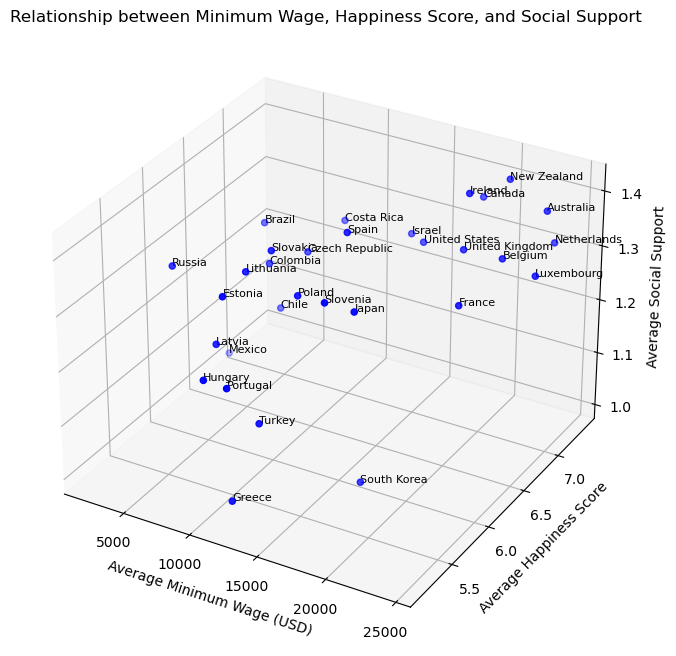

In [40]:
# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    wage_social_happy['Average Minimum Wage Yearly in USD 2015-2018'],
    wage_social_happy['Average Happiness Score 2015-2018'],
    wage_social_happy['Average Social Support 2015-2018'],
    c='b',  # Color of the data points
    marker='o'  # Marker style
)

# Add country labels to the plot
for i, txt in enumerate(wage_social_happy['Country']):
    ax.text(
        wage_social_happy.loc[i, 'Average Minimum Wage Yearly in USD 2015-2018'],
        wage_social_happy.loc[i, 'Average Happiness Score 2015-2018'],
        wage_social_happy.loc[i, 'Average Social Support 2015-2018'],
        txt,  # Country label
        size=8,  # Text size
        zorder=1,  # Priority over data points
        color='k'  # Text color
    )

# Set labels and title
ax.set_xlabel('Average Minimum Wage (USD)')
ax.set_ylabel('Average Happiness Score')
ax.set_zlabel('Average Social Support')
ax.set_title('Relationship between Minimum Wage, Happiness Score, and Social Support')

# Calculate correlation coefficients
corr_min_wage_happiness = wage_social_happy['Average Minimum Wage Yearly in USD 2015-2018'].corr(wage_social_happy['Average Happiness Score 2015-2018'])
corr_min_wage_social_support = wage_social_happy['Average Minimum Wage Yearly in USD 2015-2018'].corr(wage_social_happy['Average Social Support 2015-2018'])

# Perform hypothesis testing
pvalue_min_wage_happiness = stats.pearsonr(wage_social_happy['Average Minimum Wage Yearly in USD 2015-2018'], wage_social_happy['Average Happiness Score 2015-2018'])[1]
pvalue_min_wage_social_support = stats.pearsonr(wage_social_happy['Average Minimum Wage Yearly in USD 2015-2018'], wage_social_happy['Average Social Support 2015-2018'])[1]

# Display correlation coefficients and p-values
print(f"Correlation between Minimum Wage and Happiness Score: {corr_min_wage_happiness:.3f}")
print(f"Correlation between Minimum Wage and Social Support: {corr_min_wage_social_support:.3f}")
print(f"P-value for correlation between Minimum Wage and Happiness Score: {pvalue_min_wage_happiness:.3f}")
print(f"P-value for correlation between Minimum Wage and Social Support: {pvalue_min_wage_social_support:.3f}")

# Show the plot
plt.show()

##### *The correlation coefficient between the average minimum wage and happiness score is 0.450. This indicates a moderate positive correlation between these two variables. 

##### *The correlation coefficient between the average minimum wage and social support is 0.363. This suggests a moderate positive correlation between these two variables. Higher minimum wages tend to be associated with higher levels of social support, but the relationship is not as strong as with the happiness score.

##### * The p-value associated with the correlation between minimum wage and happiness score is 0.011. This indicates that the observed correlation is statistically significant.

##### * The p-value associated with the correlation between minimum wage and social support is 0.044. This suggests that the observed correlation is also  statistically significant. 



### 9.  Compare levels of government corruption with minimum wage

In [41]:
# Use minihappy data frame to make new data frame comparing Government Corruption with Minimum Wage
minihappy.head()

,Country,2015,2016,2017,2018,Happiness Score_2015,Economy (GDP per Capita)_2015,Social support_2015,Healthy life expectancy_2015,Freedom_2015,Government Corruption_2015,Generosity_2015,Happiness Score_2016,Economy (GDP per Capita)_2016,Social support_2016,Healthy life expectancy_2016,Freedom_2016,Government Corruption_2016,Generosity_2016,Happiness Score_2017,Economy (GDP per Capita)_2017,Social support_2017,Healthy life expectancy_2017,Freedom_2017,Government Corruption_2017,Generosity_2017,Happiness Score_2018,Economy (GDP per Capita)_2018,Social support_2018,Healthy life expectancy_2018,Freedom_2018,Government Corruption_2018,Generosity_2018
0,Australia,22718.9,22982.2,23187.2,23975.6,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,7.313,1.44443,1.10476,0.85120,0.56837,0.32331,0.47407,7.284,1.484415,1.510042,0.843887,0.601607,0.301184,0.477699,7.272,1.340,1.573,0.910,0.647,0.302,0.361
1,Belgium,22119.2,21908.5,21882.2,21654.4,6.937,1.30782,1.28566,0.89667,0.58450,0.22540,0.22250,6.929,1.42539,1.05249,0.81959,0.51354,0.26248,0.24240,6.891,1.463781,1.462313,0.818092,0.539771,0.251343,0.231503,6.927,1.324,1.483,0.894,0.583,0.240,0.188
2,Canada,17338.9,17606.8,17913.0,19811.1,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.404,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,7.316,1.479204,1.481349,0.834558,0.611101,0.287372,0.435540,7.328,1.330,1.532,0.896,0.653,0.291,0.321
3,Chile,6534.6,6893.9,7178.7,7319.5,6.670,1.10715,1.12447,0.85857,0.44132,0.12869,0.33363,6.705,1.21670,0.90587,0.81883,0.37789,0.11451,0.31595,6.652,1.252785,1.284025,0.819480,0.376895,0.082288,0.326662,6.476,1.131,1.331,0.808,0.431,0.061,0.197
4,Czech Republic,8217.9,8783.1,9525.6,10342.4,6.505,1.17898,1.20643,0.84483,0.46364,0.02652,0.10686,6.596,1.30915,1.00793,0.76376,0.41418,0.03986,0.09929,6.609,1.352682,1.433885,0.754444,0.490946,0.036873,0.088107,6.711,1.233,1.489,0.854,0.543,0.034,0.064


In [42]:
minihappy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        31 non-null     object 
 1   2015                           31 non-null     float64
 2   2016                           31 non-null     float64
 3   2017                           31 non-null     float64
 4   2018                           31 non-null     float64
 5   Happiness Score_2015           31 non-null     float64
 6   Economy (GDP per Capita)_2015  31 non-null     float64
 7   Social support_2015            31 non-null     float64
 8   Healthy life expectancy_2015   31 non-null     float64
 9   Freedom_2015                   31 non-null     float64
 10  Government Corruption_2015     31 non-null     float64
 11  Generosity_2015                31 non-null     float64
 12  Happiness Score_2016           31 non-null     float

In [43]:
# Create new data frame that returns average government_corruption score data.
corrupt_wage = minihappy.iloc[:,[0,10,17,24,31]]
corrupt_wage['Average Government Corruption 2015-2018']=corrupt_wage.mean(axis=1)
corrupt_wage.head()

/var/folders/fq/ssrkbmxx7mncl8h7g2g0406m0000gn/T/ipykernel_10575/454357422.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  corrupt_wage['Average Government Corruption 2015-2018']=corrupt_wage.mean(axis=1)
/var/folders/fq/ssrkbmxx7mncl8h7g2g0406m0000gn/T/ipykernel_10575/454357422.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrupt_wage['Average Government Corruption 2015-2018']=corrupt_wage.mean(axis=1)


,Country,Government Corruption_2015,Government Corruption_2016,Government Corruption_2017,Government Corruption_2018,Average Government Corruption 2015-2018
0,Australia,0.35637,0.32331,0.301184,0.302,0.320716
1,Belgium,0.22540,0.26248,0.251343,0.240,0.244806
2,Canada,0.32957,0.31329,0.287372,0.291,0.305308
3,Chile,0.12869,0.11451,0.082288,0.061,0.096622
4,Czech Republic,0.02652,0.03986,0.036873,0.034,0.034313


In [44]:
corrupt_wage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country                                  31 non-null     object 
 1   Government Corruption_2015               31 non-null     float64
 2   Government Corruption_2016               31 non-null     float64
 3   Government Corruption_2017               31 non-null     float64
 4   Government Corruption_2018               31 non-null     float64
 5   Average Government Corruption 2015-2018  31 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.7+ KB


In [45]:
# Create series that returns Average Government_Corruption 2015-2018.
corrupt_wage2 = corrupt_wage.iloc[:,[0,5]]
corrupt_wage2 = corrupt_wage2.set_index('Country')
corrupt_wage2 = corrupt_wage2.sort_values('Average Government Corruption 2015-2018', ascending=False)
corrupt_wage2.head()

,Average Government Corruption 2015-2018
Country,
New Zealand,0.405019
Luxembourg,0.342776
Australia,0.320716
Canada,0.305308
Netherlands,0.298768


In [46]:
# Merge the mini2 series and corrupt_wage2 series to create data frame 
# comparing a country's Average Minimum Wage with Government Corruption.
wages_corrupt = pd.concat([mini2, corrupt_wage2], axis=1)
wages_corrupt.head()

,Average Minimum Wage Yearly in USD 2015-2018,Average Government Corruption 2015-2018
Country,,
Luxembourg,24397.925,0.342776
Netherlands,23367.375,0.298768
Australia,23215.975,0.320716
Belgium,21891.075,0.244806
France,20987.050,0.183261


In [47]:
# Reset the index to facilitate the creation of a scatterplot.
wages_corrupt = wages_corrupt.reset_index()
wages_corrupt.head()

,Country,Average Minimum Wage Yearly in USD 2015-2018,Average Government Corruption 2015-2018
0,Luxembourg,24397.925,0.342776
1,Netherlands,23367.375,0.298768
2,Australia,23215.975,0.320716
3,Belgium,21891.075,0.244806
4,France,20987.050,0.183261


Regression Equation: y = 0.000x + -0.039
Correlation Coefficient: 0.728
p-value: 0.000
Standard Error: 0.000


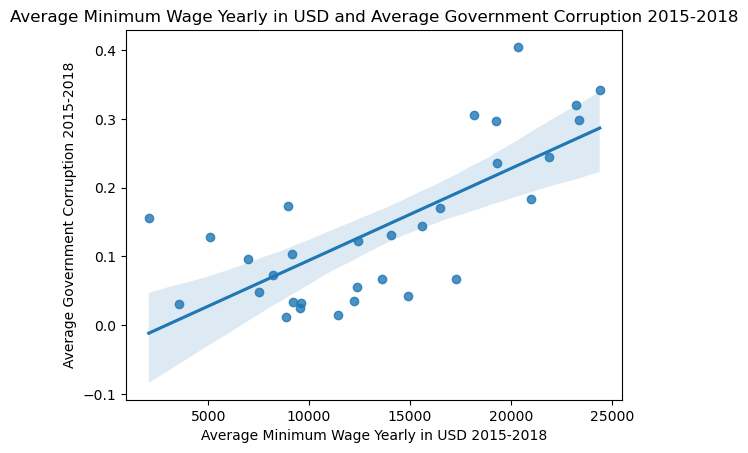

In [48]:
# Create scatterplot comparing Average Minimum Wage with Government Corruption.
sns.regplot(x='Average Minimum Wage Yearly in USD 2015-2018', y='Average Government Corruption 2015-2018', data=wages_corrupt)

#Set the x and y axis labels.
plt.xlabel('Average Minimum Wage Yearly in USD 2015-2018')
plt.ylabel('Average Government Corruption 2015-2018')

#Set the title of the plot.
plt.title('Average Minimum Wage Yearly in USD and Average Government Corruption 2015-2018')

#Calculate the regression equation, correlation coefficient, p-value, and standard error.
slope, intercept, r_value, p_value, std_err = stats.linregress(wages_corrupt['Average Minimum Wage Yearly in USD 2015-2018'],
wages_corrupt['Average Government Corruption 2015-2018'])
correlation_coefficient = np.corrcoef(wages_corrupt['Average Minimum Wage Yearly in USD 2015-2018'], wages_corrupt['Average Government Corruption 2015-2018'])[0,1]

#Display the regression equation, correlation coefficient, p-value, and standard error.
#Set the slope, intercept, correlation coefficient, and p_value to .3f to round the numbers to three decimal places.
print(f"Regression Equation: y = {slope:.3f}x + {intercept:.3f}")
print(f"Correlation Coefficient: {correlation_coefficient:.3f}")
print(f"p-value: {p_value:.3f}")
print(f"Standard Error: {std_err:.3f}")

#Display the plot.
plt.show()

##### * The regression equation indicates that there is a positive slope (0.000) but with a very small value, suggesting that there is almost no linear relationship between the average minimum wage and government corruption.

##### *The correlation coefficient is 0.728, which indicates a moderately strong positive correlation between average minimum wage and government corruption.

##### *The p-value is 0.000, which is below the typical significance level of 0.05. This suggests that the correlation between average minimum wage and government corruption is statistically significant.

##### *The standard error of 0.000 suggests that the estimate of the regression coefficient is very precise. However, since the slope coefficient is close to zero, the standard error is not particularly informative in this case.



# Conclusion

##### *It's interesting to note that countries with low minimum wage, but high happiness had lower average social support scores than countries with high minimum wage and high happiness as well as the average social supprt scores for all countries.  It's possible these reults are due to the small sample size used in this study.  A larger sample sizae would be more appropriate.  

##### * While there is a positive relationship between social support and happiness scores, this analysis does not establish a causal relationship. Other factors and variables not considered in this analysis could influence happiness scores.

##### * The results indicate that there is a moderate positive correlation between minimum wage and both happiness score and social support. Higher minimum wages are associated with higher levels of happiness and social support, although the strength of the relationships is not extremely strong.

##### *Overall, there is a moderate positive correlation between average minimum wage and government corruption, but the slope of the relationship is almost negligible.

## Suggestions for Further Study

##### It may be useful to expand the study to include more countries and cover a larger time period.

##### Explore the relationships between other variables in the datasets:

#####  Compare happiness scores and minimum wage with generosity.



##### Explore the relationship between happiness and other socioeconomic factors not present in these datasets such as income inequlity, education level and employment rate and how they interact with minimum wage.

##### Explore the relationship between minimum wage and different demographic groups, such as age, gender and race to understand how it impacts happiness among these different groups.

##### Compare happiness scores with other economic indicators such as the amount of GDP a country spends on social support.

